In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn import tree
import graphviz

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head(4)
colname = list(df)

In [3]:
def hito(tab):
    for item in tab:
        g = sns.countplot(df[item])
        plt.show()

In [29]:
#histograms = hito(colname)

In [5]:
def contTab(tableau):
    pval = np.zeros(len(tableau)-1)
    tab = []
    for i in range(len(tableau)-1):
        temp = pd.crosstab(df[tableau[i+1]], df[tableau[0]])
        tab.append(temp)
        np.append(pval,chi2_contingency(temp)[1])
    return pval

In [6]:
pValue = contTab(colname)
len(pValue[pValue <= 0.05])

22

In [7]:
y = df['class']
x = df.drop(labels = ["class"],axis = 1)
x = pd.get_dummies(x)

clf = tree.DecisionTreeClassifier(min_samples_split=6,min_impurity_decrease=0.02)
clf = clf.fit(x, y)


dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("df") 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(x),
                         class_names= list(y),       
                         filled=True, rounded=True,  
                         special_characters=True)


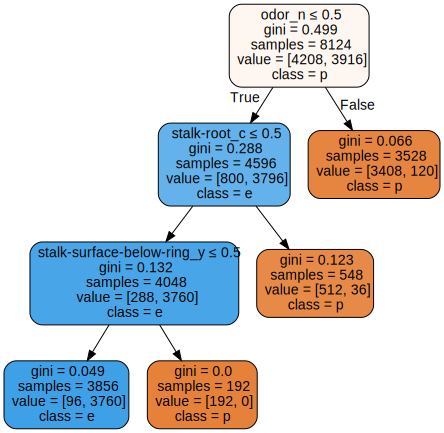

In [8]:
graph = graphviz.Source(dot_data)
graph

In [9]:
importances = clf.feature_importances_ 
print(importances)

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.70115413  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.20143456
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.09741131  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0

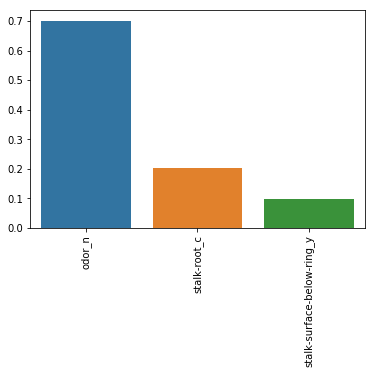

In [10]:
plot = sns.barplot(x=x.columns[importances>=0.05], y=importances[importances>=0.05])

for item in plot.get_xticklabels():
    item.set_rotation(90)

In [26]:
Y = df['class']
X = df.drop(labels = ["class","odor"],axis = 1)
X = pd.get_dummies(X)

clf1 = tree.DecisionTreeClassifier(min_samples_split=6,min_impurity_decrease=0.02)
clf1 = clf1.fit(X, Y)


dot_data1 = tree.export_graphviz(clf1, out_file=None) 
graphe = graphviz.Source(dot_data1) 
graphe.render("df") 
dot_data1 = tree.export_graphviz(clf1, out_file=None, feature_names=list(X), class_names= list(Y), filled=True, rounded=True, special_characters=True)

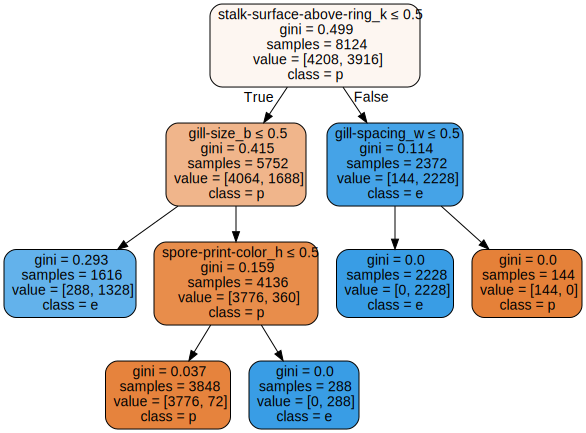

In [27]:
graphe = graphviz.Source(dot_data1)
graphe

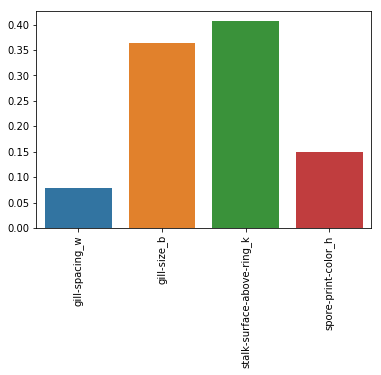

In [28]:
importance = clf1.feature_importances_ 
plot = sns.barplot(x=X.columns[importance>=0.05], y=importance[importance>=0.05])

for item in plot.get_xticklabels():
    item.set_rotation(90)